In [75]:
import os
os.getcwd()

'/Users/chidam'

In [76]:
import pandas as pd
df=pd.read_csv('/Users/chidam/Desktop/housing_prices_kaggle_train.csv')

In [77]:
df.drop(df.index[[523,691,1182,1298, 1169]], inplace=True)
df=df.reset_index(drop=True)#here drop=True means to drop the alreading existing index column

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
df['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010])

In [80]:
df['YrSold'].value_counts()

2009    338
2007    326
2006    313
2008    303
2010    175
Name: YrSold, dtype: int64

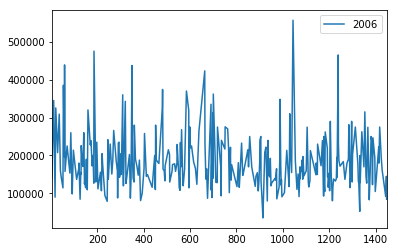

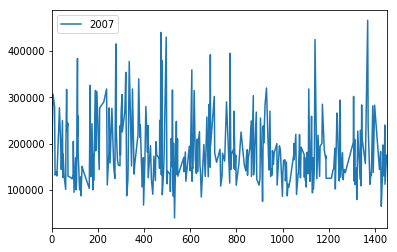

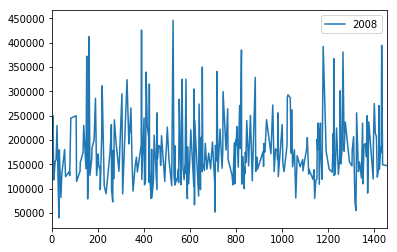

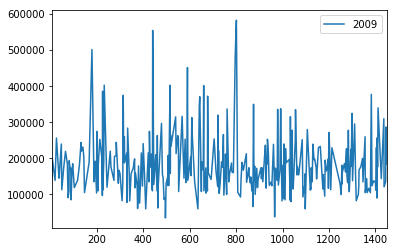

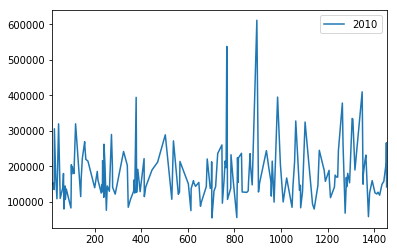

In [22]:
#There is no clear pattern understanbly due to the fluctuations of housing market during 2008 financial crash
for index, group in df.groupby(['YrSold']):
#     print(group)
#     group_agg = group.groupby(['Condition1']).mean()
    group.plot(y='SalePrice', label=index)



In [81]:
df.groupby('YrSold')['SalePrice'].min()

YrSold
2006    35311
2007    39300
2008    40000
2009    34900
2010    55000
Name: SalePrice, dtype: int64

In [9]:
import calendar
df['MoSold'] = df['MoSold'].apply(lambda x: calendar.month_abbr[x])






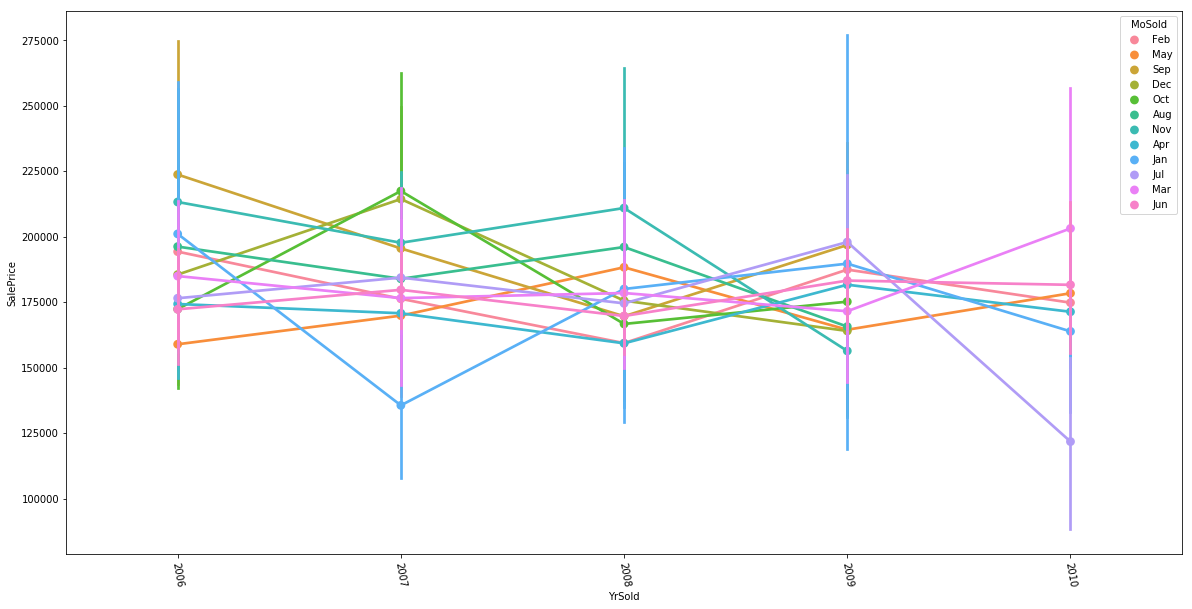

In [30]:
#It is clear that there are positive and negative trends and therefore might be a better signal in predicting the SalePrice
#and it is also a fact that months play a role in buying and selling houses
plt.figure(figsize=(20,10))
ax = sns.pointplot(x='YrSold', y='SalePrice', hue='MoSold', data=df, linewidth=2.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-80);

In [10]:
df['MoSold'].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [11]:
#To group months according to season: summer, winter, autumn, and spring

df.loc[(df['MoSold']=='Jun') | (df['MoSold']=='Jul') | (df['MoSold']=='Aug'),'MoSold']='Summer'
df.loc[(df['MoSold']=='Mar') | (df['MoSold']=='Apr') | (df['MoSold']=='May'),'MoSold']= 'Spring'
df.loc[(df['MoSold']=='Sep') | (df['MoSold']=='Oct') | (df['MoSold']=='Nov'),'MoSold']='Autumn'
df.loc[(df['MoSold']=='Jan') | (df['MoSold']=='Feb') | (df['MoSold']=='Dec'),'MoSold']='Winter'


In [12]:
df['MoSold'].value_counts()

Summer    607
Spring    451
Autumn    230
Winter    167
Name: MoSold, dtype: int64

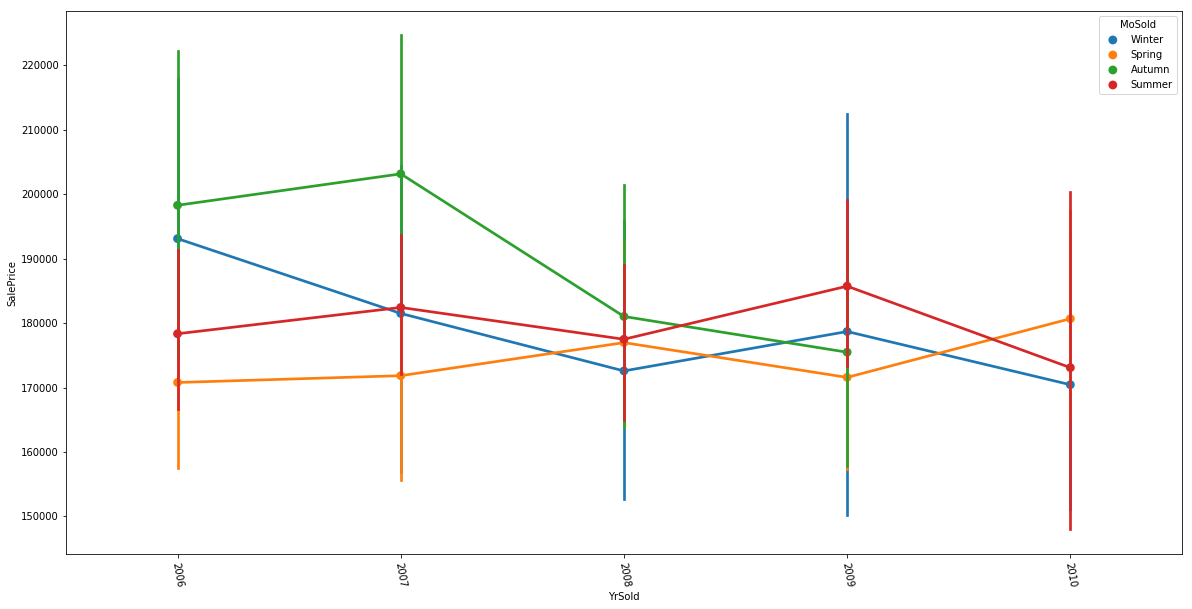

In [35]:
#It makes more sense in terms of seasonal changes with autumn steadily declining and summer doing better. Also from 2007 to 2008
the SalePrice declined in autumn and winter.
plt.figure(figsize=(20,10))
ax = sns.pointplot(x='YrSold', y='SalePrice', hue='MoSold', data=df, linewidth=2.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-80);

In [ ]:
#From 2006 to 2008 there was a steady decline in SalePrice, but optimistically rised from 2008 to 2009.
#Planning to frequency encode the seasonal changes




In [13]:
#To group neighborhood
d=dict(df.groupby('Neighborhood')['SalePrice'].max())

In [139]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
df['MSZoning'].value_counts()

RL         1146
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [30]:
df.groupby('YrSold')['MSZoning'].value_counts()

YrSold  MSZoning
2006    RL          245
        RM           50
        FV           13
        RH            3
        C (all)       2
2007    RL          259
        RM           45
        FV           15
        RH            6
        C (all)       1
2008    RL          231
        RM           53
        FV           14
        RH            3
        C (all)       2
2009    RL          270
        RM           47
        FV           15
        RH            4
        C (all)       2
2010    RL          141
        RM           23
        FV            8
        C (all)       3
Name: MSZoning, dtype: int64

In [35]:
#There is no clear pattern re whether the 2008 financial crisis was a major cause in affecting how home buyers chose which
#house to buy and in which neighborhood. Mostly Single-family Detached houses were sold in the low density residential zone 
which offers more open space. Not sure whether it was super cheap to buy houses in such zones as it varies from place to place and therefore from 
state to state. It could mean that we are dealing with completely different set of homebuyers who had money to buy house
(may be the house prices were cheap and so home buyers took advantage of the situation)
and as the matter of fact most of the sale conditions is normal

df.groupby('YrSold')['BldgType'].value_counts()

YrSold  BldgType
2006    1Fam        257
        TwnhsE       24
        Duplex       12
        Twnhs        11
        2fmCon        9
2007    1Fam        277
        TwnhsE       25
        Duplex       13
        Twnhs         6
        2fmCon        5
2008    1Fam        252
        TwnhsE       28
        2fmCon        8
        Twnhs         8
        Duplex        7
2009    1Fam        286
        TwnhsE       22
        Duplex       13
        Twnhs        13
        2fmCon        4
2010    1Fam        143
        TwnhsE       15
        Duplex        7
        2fmCon        5
        Twnhs         5
Name: BldgType, dtype: int64

In [38]:
df.groupby('YrSold')['Neighborhood'].value_counts()

YrSold  Neighborhood
2006    NAmes           44
        CollgCr         32
        OldTown         26
        Gilbert         24
        Edwards         19
        NWAmes          18
        NridgHt         17
        Sawyer          17
        Somerst         16
        BrkSide         15
        Crawfor         11
        Mitchel         11
        NoRidge          8
        SawyerW          8
        Blmngtn          7
        IDOTRR           7
        Timber           7
        ClearCr          6
        StoneBr          6
        BrDale           4
        SWISU            4
        MeadowV          3
        Veenker          3
2007    NAmes           53
        CollgCr         30
        OldTown         24
        Somerst         24
        Crawfor         19
        Gilbert         19
        NridgHt         18
                        ..
2009    IDOTRR           5
        MeadowV          5
        StoneBr          5
        BrDale           4
        ClearCr          4
       

In [40]:
df['YrSold'].value_counts()

2009    338
2007    326
2006    313
2008    303
2010    175
Name: YrSold, dtype: int64

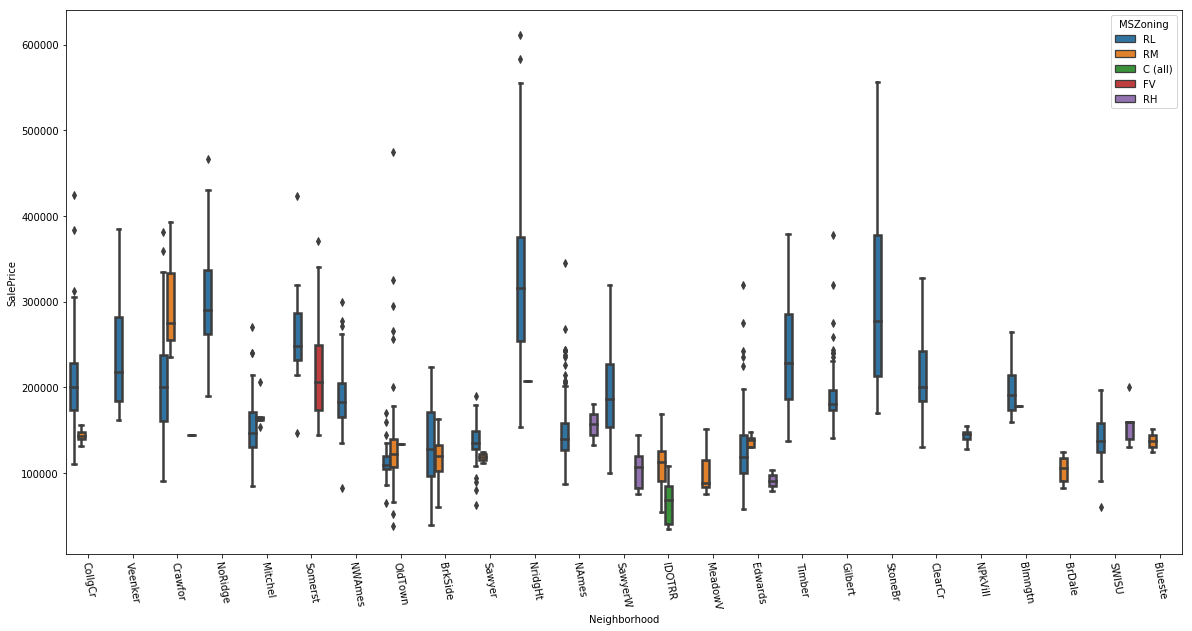

In [16]:
#Let's visualize 'Neighborhood' Vs. 'SalePrice'. Residential Low Density is prevalent in every neighborhood and this
#change is significant.
# Low Density Residential Zoning Definition. "Low density residential zones" are locations intended for housing that 
# include a lot of open space. These zones are meant for a small number of residential homes, and exclude large 
# industries, apartment complexes, and other large structures.

plt.figure(figsize=(20,10))
ax = sns.boxplot(y='SalePrice', x='Neighborhood', hue=df['MSZoning'], data=df, linewidth=2.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-80);



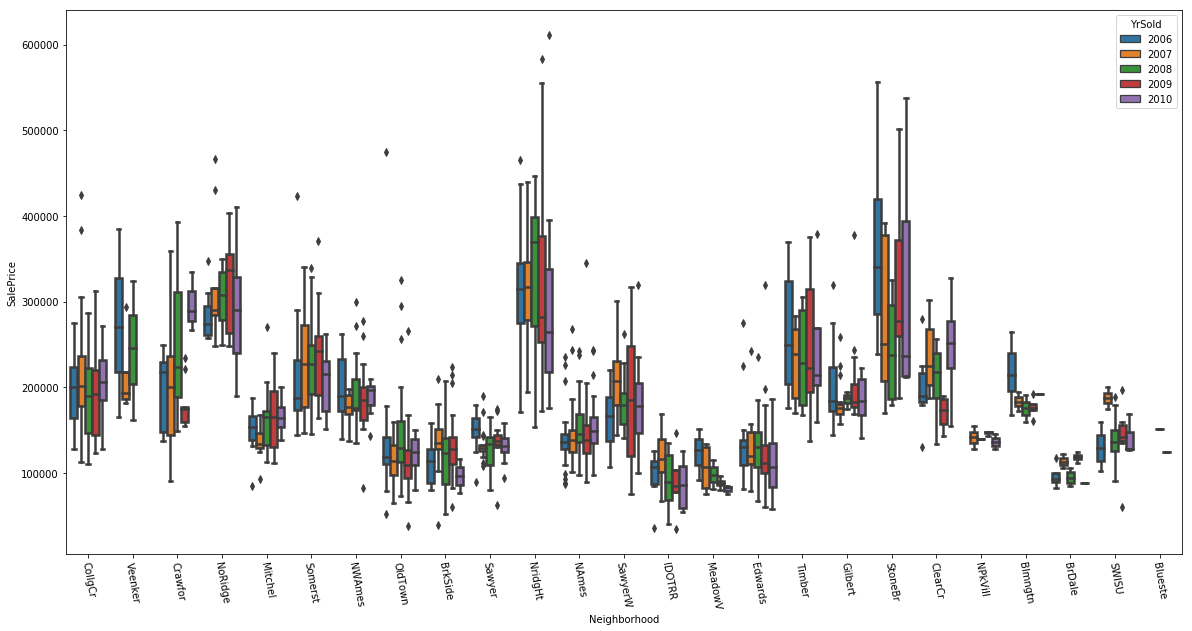

In [37]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(y='SalePrice', x='Neighborhood', hue=df['YrSold'], data=df, linewidth=2.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-80);

In [ ]:
df.groupby('Neighborhood')[]

In [136]:
df.groupby()['SalePrice'].max()

Neighborhood
Blmngtn    264561
Blueste    151000
BrDale     125000
BrkSide    223500
ClearCr    328000
CollgCr    424870
Crawfor    392500
Edwards    320000
Gilbert    377500
IDOTRR     169500
MeadowV    151400
Mitchel    271000
NAmes      345000
NPkVill    155000
NWAmes     299800
NoRidge    466500
NridgHt    611657
OldTown    475000
SWISU      200000
Sawyer     190000
SawyerW    320000
Somerst    423000
StoneBr    556581
Timber     378500
Veenker    385000
Name: SalePrice, dtype: int64

In [137]:
df.groupby('Neighborhood')['SalePrice'].min()

Neighborhood
Blmngtn    159895
Blueste    124000
BrDale      83000
BrkSide     39300
ClearCr    130000
CollgCr    110000
Crawfor     90350
Edwards     58500
Gilbert    141000
IDOTRR      34900
MeadowV     75000
Mitchel     84500
NAmes       87500
NPkVill    127500
NWAmes      82500
NoRidge    190000
NridgHt    154000
OldTown     37900
SWISU       60000
Sawyer      62383
SawyerW     76000
Somerst    144152
StoneBr    170000
Timber     137500
Veenker    162500
Name: SalePrice, dtype: int64

In [138]:
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
Timber      38
NoRidge     38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [94]:
#To group the neighborhoods according to maximum SalePrice

# df.loc[df['Neighborhood']<100000,'Neighborhood'] = len(df[df['Neighborhood']<100000])/len(df['Neighborhood_grouped'])




# dict(df.groupby('Neighborhood')['SalePrice'].max())


def neighborhood_convert(d):
    d2=defaultdict(list)
    for k, v in d.items():
        if v<=200000:
            d2['g1'].append(k)     
        elif (v>200000) & (v<=300000):
            d2['g2'].append(k)
        elif (v>300000) & (v<=400000):
            d2['g3'].append(k)
        else:
            d2['g4'].append(k)
            
    return d2
            
            
        
            
    
    

In [95]:
neighborhood_convert(dict(df.groupby('Neighborhood')['SalePrice'].max()))

defaultdict(list,
            {'g1': ['IDOTRR',
              'MeadowV',
              'SWISU',
              'BrDale',
              'NPkVill',
              'Blueste',
              'Sawyer'],
             'g2': ['Blmngtn', 'Mitchel', 'BrkSide', 'NWAmes'],
             'g3': ['Veenker',
              'SawyerW',
              'ClearCr',
              'Edwards',
              'Gilbert',
              'NAmes',
              'Timber',
              'Crawfor'],
             'g4': ['NoRidge',
              'NridgHt',
              'StoneBr',
              'OldTown',
              'Somerst',
              'CollgCr']})

In [116]:
df.loc[(df['Neighborhood']=='IDOTRR'), 'Neighborhood']='g'

df.loc[(df['Neighborhood']=='MeadowV')|(df['Neighborhood']=='SWISU')|(df['Neighborhood']=='BrDale')|(df['Neighborhood']=='NPkVill')|(df['Neighborhood']=='Blueste')|(df['Neighborhood']=='Sawyer'),'Neighborhood']='g' 
        

In [118]:
df.loc[(df['Neighborhood']=='Blmngtn')|(df['Neighborhood']=='Mitchel')|(df['Neighborhood']=='BrkSide')|(df['Neighborhood']=='NWAmes'),'Neighborhood']='h' 
       

In [120]:
df.loc[(df['Neighborhood']=='Veenker')|(df['Neighborhood']=='SawyerW')|(df['Neighborhood']=='ClearCr')|(df['Neighborhood']=='Edwards')|(df['Neighborhood']=='Gilbert')|(df['Neighborhood']=='NAmes')|(df['Neighborhood']=='Timber')|(df['Neighborhood']=='Crawfor'),'Neighborhood']='i' 


In [121]:
df.loc[(df['Neighborhood']=='NoRidge')|(df['Neighborhood']=='NridgHt')|(df['Neighborhood']=='StoneBr')|(df['Neighborhood']=='OldTown')|(df['Neighborhood']=='Somerst')|(df['Neighborhood']=='CollgCr'),'Neighborhood']='j' 
         

In [122]:
df['Neighborhood'].unique()

array(['j', 'i', 'h', 'g'], dtype=object)

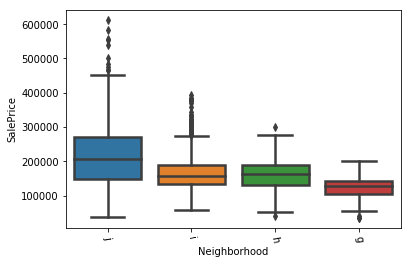

In [123]:
ax = sns.boxplot(y='SalePrice', x='Neighborhood', data=df, linewidth=2.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-80);




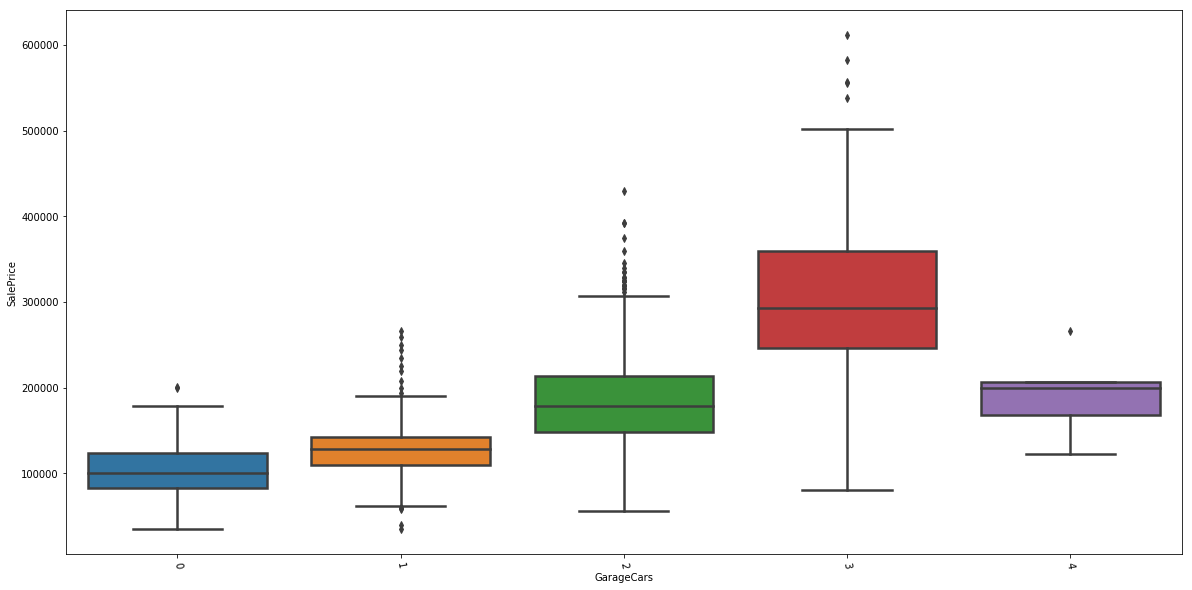

In [41]:
#GarageCars Vs. SalePrice

plt.figure(figsize=(20,10))
ax = sns.boxplot(y='SalePrice', x='GarageCars', data=df, linewidth=2.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-80);



In [44]:
df.groupby('GarageCars')['SalePrice'].max()

GarageCars
0    200500
1    266500
2    430000
3    611657
4    265979
Name: SalePrice, dtype: int64

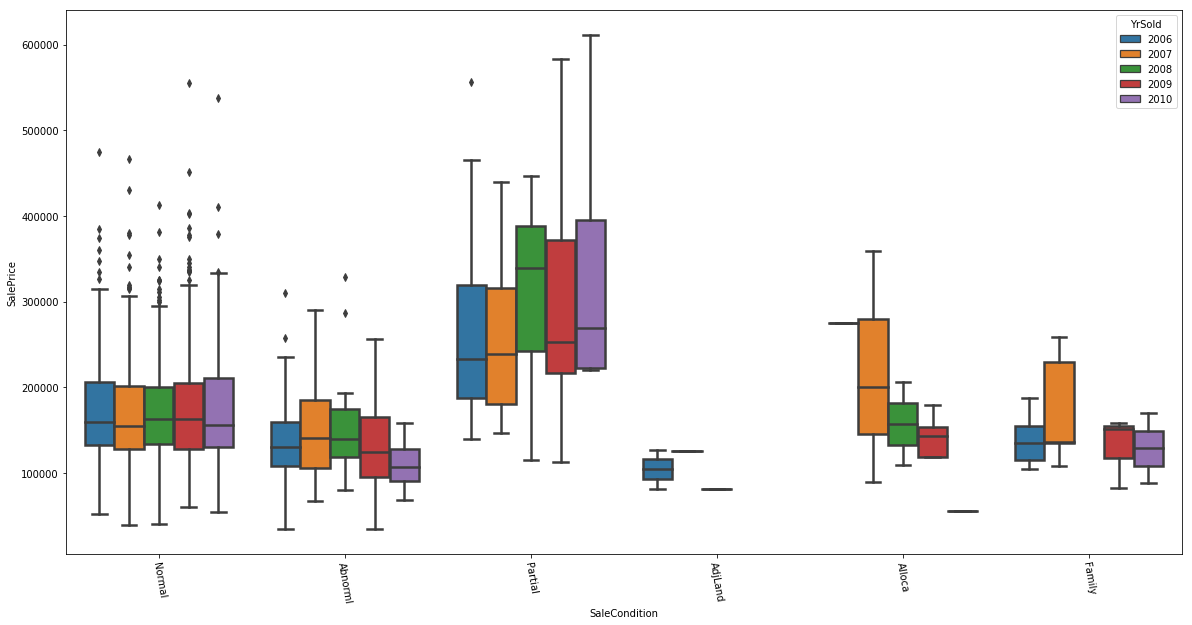

In [46]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(y='SalePrice', x='SaleCondition', hue=df['YrSold'],data=df, linewidth=2.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-80);




In [47]:
df.groupby('SaleCondition')['SalePrice'].max()

SaleCondition
Abnorml    328900
AdjLand    127500
Alloca     359100
Family     259000
Normal     555000
Partial    611657
Name: SalePrice, dtype: int64

In [48]:
df['SaleCondition'].value_counts()

Normal     1196
Partial     123
Abnorml     100
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [49]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

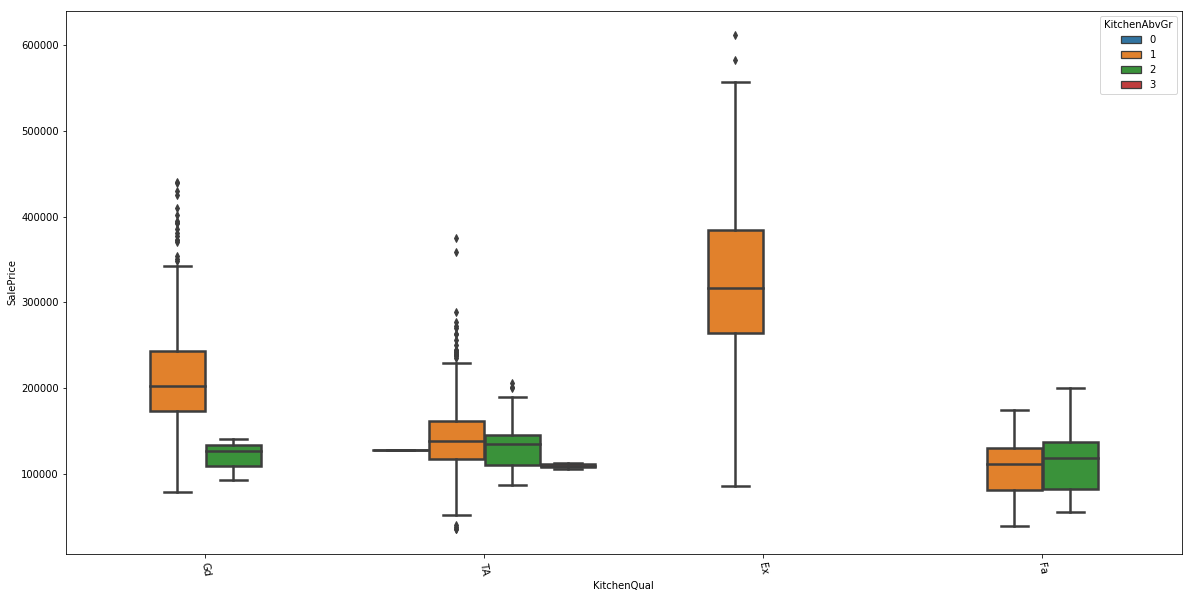

In [56]:
#'KitchenAbvGr' does not seem to be a strong signal but 'KitchenQual' seems like because kitchen at excellent quality sold
#at higher selling price


plt.figure(figsize=(20,10))
ax = sns.boxplot(y='SalePrice', x='KitchenQual', hue=df['KitchenAbvGr'], data=df, linewidth=2.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-80);








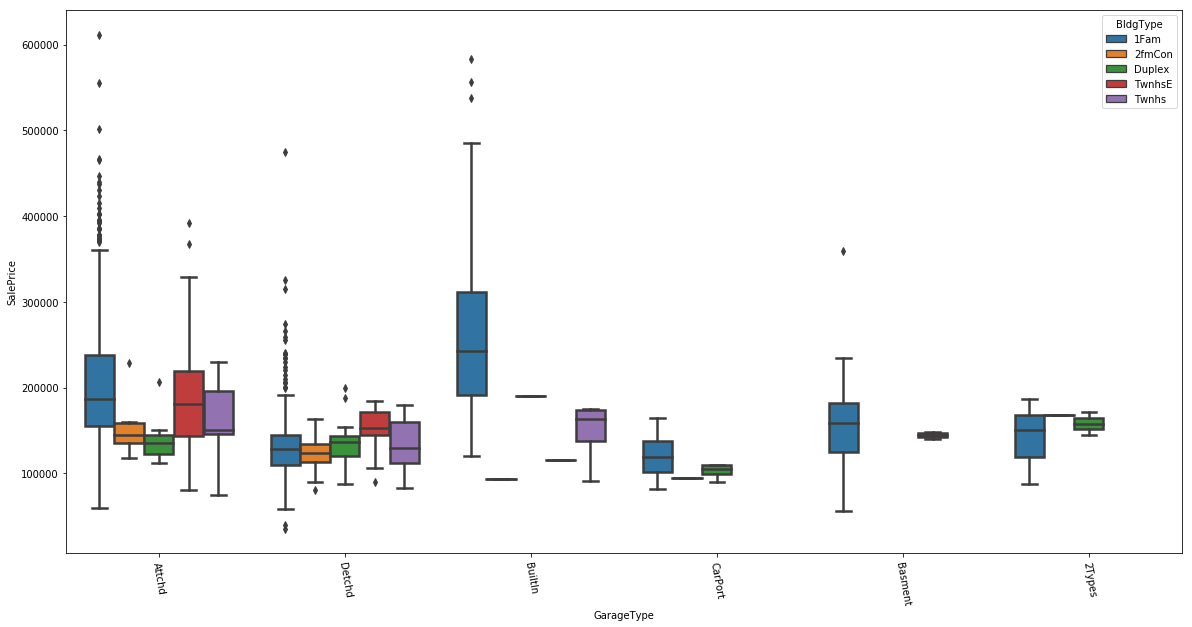

In [57]:

plt.figure(figsize=(20,10))
ax = sns.boxplot(y='SalePrice', x='GarageType', hue=df['BldgType'], data=df, linewidth=2.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-80);






In [58]:
#Encode 'GarageType' by adding negative sign to Detchd type



df['GarageType'].value_counts()

Attchd     866
Detchd     387
BuiltIn     87
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

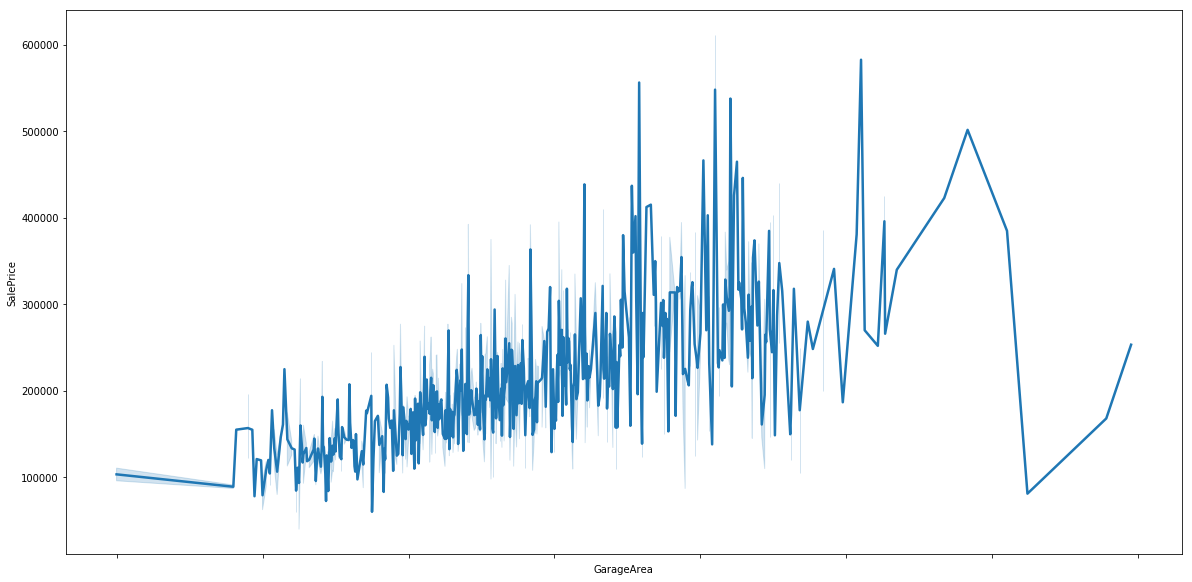

In [62]:


plt.figure(figsize=(20,10))
ax = sns.lineplot(y='SalePrice', x='GarageArea', data=df, linewidth=2.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-80);




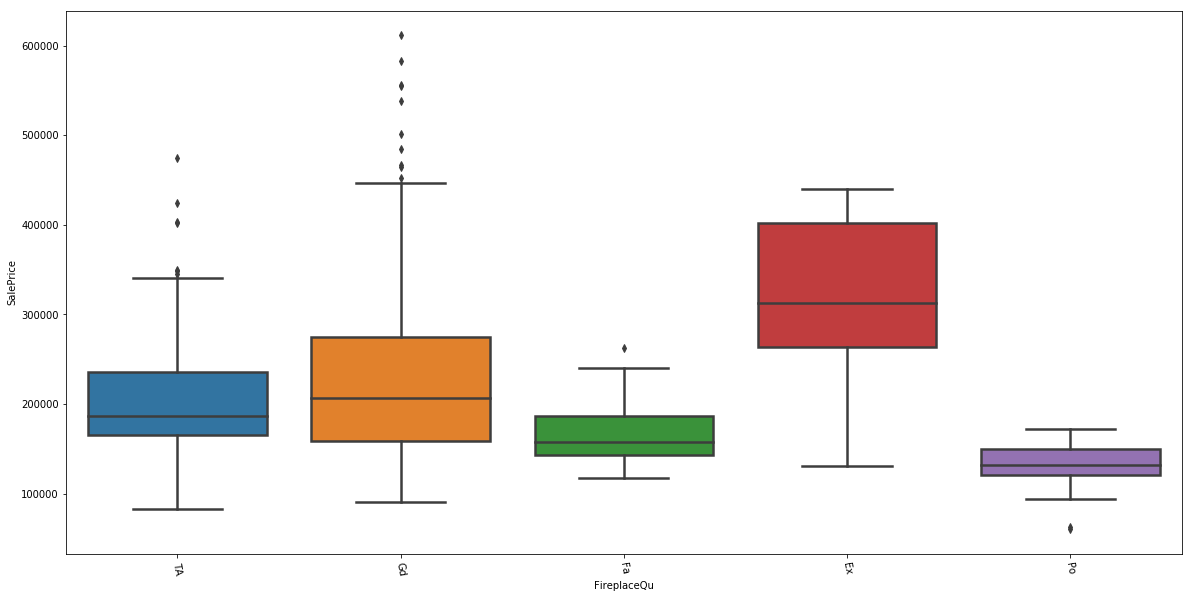

In [63]:


plt.figure(figsize=(20,10))
ax = sns.boxplot(y='SalePrice', x='FireplaceQu', data=df, linewidth=2.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-80);





In [64]:
df['FireplaceQu'].value_counts()

Gd    378
TA    311
Fa     33
Ex     23
Po     20
Name: FireplaceQu, dtype: int64

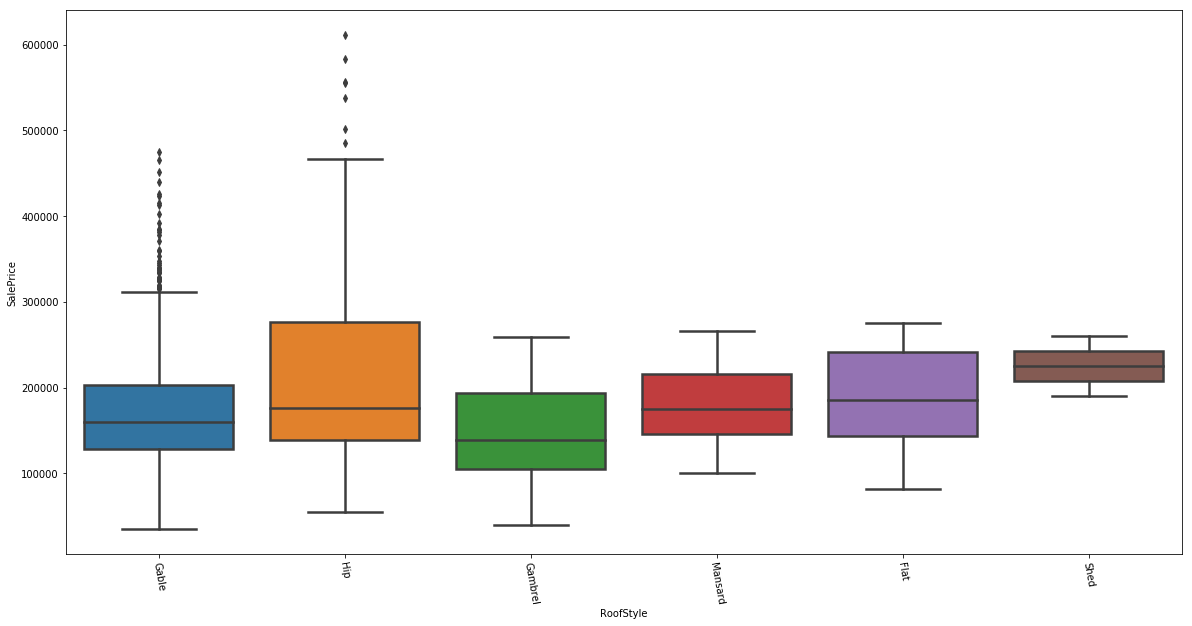

In [67]:


plt.figure(figsize=(20,10))
ax = sns.boxplot(y='SalePrice', x='RoofStyle', data=df, linewidth=2.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-80);





In [ ]:
#To convert the features: MSZoning, GarageType, 'GarageCars', 'GarageArea', 'SaleCondition', 'KitchenQual'




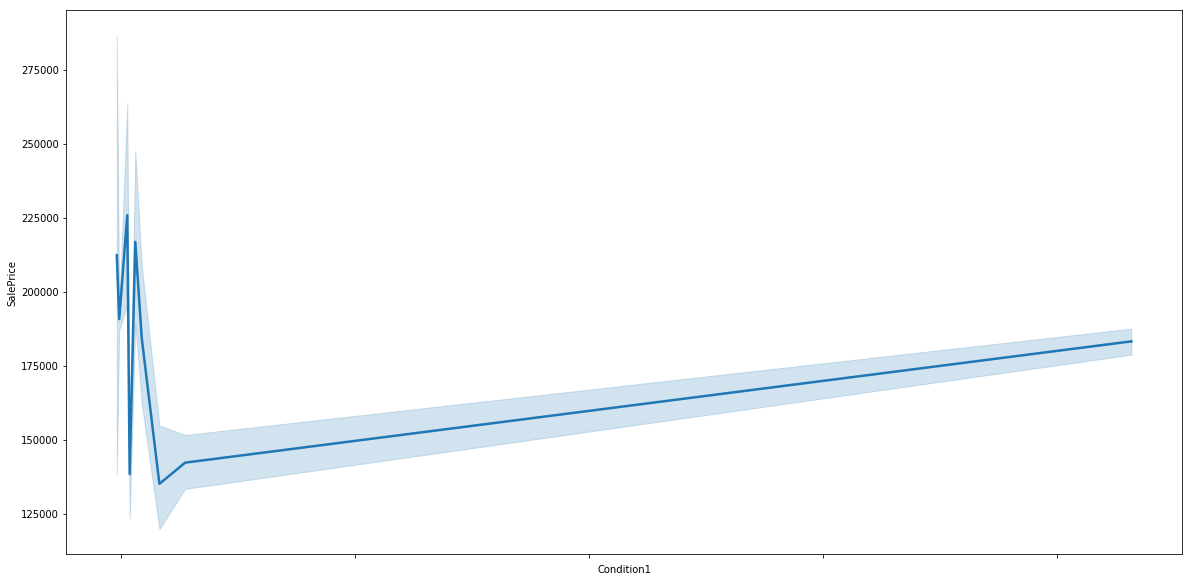

In [73]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(y='SalePrice', x='Condition1', data=df, linewidth=2.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-80);





In [69]:
df.groupby('Condition1')['SalePrice'].max()

Condition1
Artery    475000
Feedr     244600
Norm      611657
PosA      335000
PosN      385000
RRAe      171000
RRAn      423000
RRNe      194500
RRNn      320000
Name: SalePrice, dtype: int64

In [82]:
# def convert_categorical(d, x, y, col_name):
#     import pandas as pd
#     for ele in range(len(x)):
#         if (x[ele]=='RRNn') or (x[ele]=='RRNe'):
#             if x[ele] in y:
#                 x[ele]=-y[x[ele]]
                
#         else:
#             if x[ele] in y:
#                 x[ele]=y[x[ele]]
        
#     d.drop(col_name, axis=1)
#     d[col_name]=pd.Series(x)
#     return d[col_name].head()
    
# convert_categorical(df, df['Condition1'].tolist(), dict(df['Condition1'].value_counts()/len(df)), 'Condition1')

In [83]:
df['Condition1'].value_counts()

Norm      1257
Feedr       80
Artery      48
RRAn        26
PosN        18
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [84]:
df['Condition2'].value_counts()

Norm      1441
Feedr        6
Artery       2
RRNn         2
RRAn         1
RRAe         1
PosA         1
PosN         1
Name: Condition2, dtype: int64

In [86]:
df.loc[df['Condition1']=='Artery', 'MSZoning'].value_counts()

RL    26
RM    21
RH     1
Name: MSZoning, dtype: int64

In [87]:
df.loc[df['Condition1']=='Feedr', 'MSZoning'].value_counts()

RL         64
RM         11
RH          3
C (all)     2
Name: MSZoning, dtype: int64

In [88]:
df.loc[df['Condition1']=='Norm', 'MSZoning'].value_counts()

RL         994
RM         179
FV          64
RH          12
C (all)      8
Name: MSZoning, dtype: int64

In [89]:
df.loc[df['Condition1']=='RRAn', 'MSZoning'].value_counts()

RL    23
RM     2
FV     1
Name: MSZoning, dtype: int64

In [90]:
df['MSZoning'].value_counts()

RL         1146
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

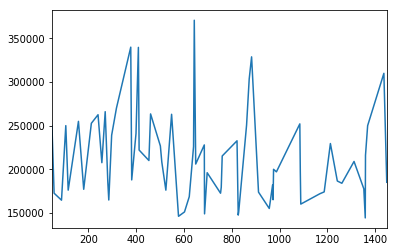

In [96]:
df.loc[df['MSZoning']=='FV', 'SalePrice'].plot()

In [97]:
df['Neighborhood'].

NAmes      225
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
Timber      38
NoRidge     38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [ ]:
df.loc[(df['Neighborhood']=='IDOTRR'), 'Neighborhood']='g'

df.loc[(df['Neighborhood']=='MeadowV')|(df['Neighborhood']=='SWISU')|(df['Neighborhood']=='BrDale')|(df['Neighborhood']=='NPkVill')|(df['Neighborhood']=='Blueste')|(df['Neighborhood']=='Sawyer'),'Neighborhood']='g' 
    

In [99]:
#Neighborhoods: g

g=['SWISU','IDOTRR','MeadowV','NPkVill','Sawyer','BrDale','Blueste']

In [98]:
len(df.loc[df['Neighborhood']=='IDOTRR'])

37

In [101]:
#df.loc[(df['Neighborhood']=='IDOTRR')
       
       
def convert_neighborhood(df, d):
    c=0
    for i in d:
        c+=len(df.loc[df['Neighborhood']==i])
    return c/len(df)
        
        
        

In [102]:
g=['SWISU','IDOTRR','MeadowV','NPkVill','Sawyer','BrDale','Blueste']
convert_neighborhood(df, g)

0.12371134020618557

In [108]:
df.loc[df['LotFrontage']>150, 'SalePrice']

197     235000
231     403000
932     242000
1105    274725
1125    259000
1207    164000
1332     52500
Name: SalePrice, dtype: int64

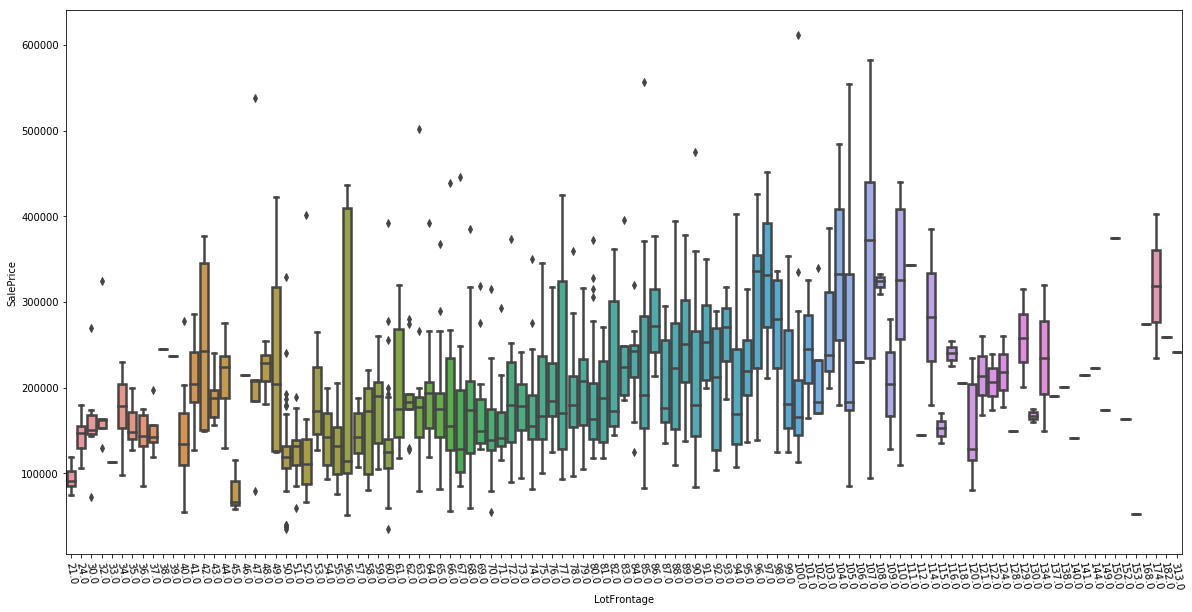

In [103]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(y='SalePrice', x='LotFrontage', data=df, linewidth=2.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-80);






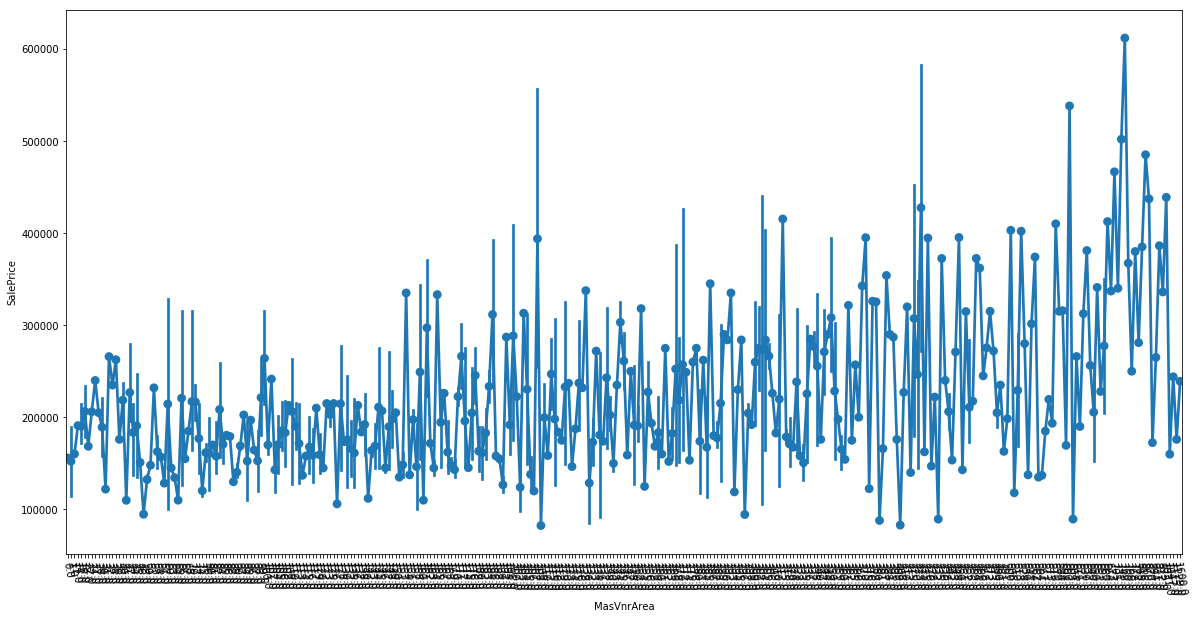

In [109]:


plt.figure(figsize=(20,10))
ax = sns.pointplot(y='SalePrice', x='MasVnrArea', data=df, linewidth=2.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-80);




In [110]:
df.groupby('GarageType')['SalePrice'].median()

GarageType
2Types     159000
Attchd     185000
Basment    148000
BuiltIn    230000
CarPort    108000
Detchd     129500
Name: SalePrice, dtype: int64

In [111]:
df['GarageType'].value_counts()

Attchd     866
Detchd     387
BuiltIn     87
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [112]:
df['MasVnrType'].value_counts()

None       863
BrkFace    443
Stone      126
BrkCmn      15
Name: MasVnrType, dtype: int64

In [113]:
df.groupby('MasVnrType')['SalePrice'].median()

MasVnrType
BrkCmn     139000
BrkFace    181000
None       143000
Stone      248614
Name: SalePrice, dtype: int64

In [114]:

df.groupby('BsmtQual')['SalePrice'].median()

BsmtQual
Ex    317500
Fa    112000
Gd    192070
TA    135500
Name: SalePrice, dtype: int64

In [115]:
df['BsmtQual'].value_counts(dropna=False)

TA     649
Gd     618
Ex     116
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

In [119]:
df['SaleCondition'].value_counts(dropna=False)

Normal     1196
Partial     123
Abnorml     100
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [120]:
df['GarageCars'].value_counts(dropna=False)

2    823
1    369
3    177
0     81
4      5
Name: GarageCars, dtype: int64

In [121]:

df['SaleType'].value_counts(dropna=False)

WD       1264
New       120
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64